# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

In [5]:
#printing out to see what cities come up
cities

['yellowknife',
 'cape town',
 'saint george',
 'busselton',
 'hithadhoo',
 'solnechnyy',
 'boddam',
 'mataura',
 'camacha',
 'ushuaia',
 'taolanaro',
 'waingapu',
 'vaini',
 'bluff',
 'bengkulu',
 'sitka',
 'hobart',
 'gornopravdinsk',
 'castro',
 'guasdualito',
 'mogochin',
 'omboue',
 'mehran',
 'barrow',
 'mar del plata',
 'tazovskiy',
 'punta arenas',
 'chuy',
 'tasiilaq',
 'ponta do sol',
 'bubaque',
 'ribeira grande',
 'leh',
 'kapaa',
 'vista hermosa',
 'robertsport',
 'saint-augustin',
 'champerico',
 'ostashkov',
 'hermanus',
 'verkhoyansk',
 'seguela',
 'port hedland',
 'jalu',
 'banfora',
 'attawapiskat',
 'dingle',
 'martinsburg',
 'rikitea',
 'port alfred',
 'torbay',
 'saskylakh',
 'albany',
 'nantucket',
 'masjed-e soleyman',
 'nisia floresta',
 'turukhansk',
 'rajapur',
 'bredasdorp',
 'avarua',
 'atuona',
 'salalah',
 'oliver',
 'georgetown',
 'cookeville',
 'fortuna',
 'aitolikon',
 'gamovo',
 'belmonte',
 'tuktoyaktuk',
 'geraldton',
 'norman wells',
 'tiksi',
 'kan

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#test call
city = 'rikitea'
url = "http://api.openweathermap.org/data/2.5/weather?q="
query_url = url  + city + "&units=imperial&appid=" + weather_api_key

#Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()
weather_json.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [7]:
#inspecting structure of the request to create for loop
weather_json

{'coord': {'lon': -134.9692, 'lat': -23.1203},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 77.88,
  'feels_like': 78.85,
  'temp_min': 77.88,
  'temp_max': 77.88,
  'pressure': 1018,
  'humidity': 74,
  'sea_level': 1018,
  'grnd_level': 1015},
 'visibility': 10000,
 'wind': {'speed': 4.79, 'deg': 34, 'gust': 5.06},
 'clouds': {'all': 28},
 'dt': 1619410324,
 'sys': {'country': 'PF', 'sunrise': 1619363831, 'sunset': 1619404681},
 'timezone': -32400,
 'id': 4030556,
 'name': 'Rikitea',
 'cod': 200}

In [8]:
#printing out data to make sure its pulling correctly
print(weather_json['coord']['lat'])
print(weather_json['coord']['lon'])
print(weather_json['main']['temp_max'])
print(weather_json['main']['humidity'])
print(weather_json['clouds']['all'])
print(weather_json['wind']['speed'])
print(weather_json['sys']['country'])
print(weather_json['dt'])


-23.1203
-134.9692
77.88
74
28
4.79
PF
1619410324


In [9]:
print("Beginning Data Retrieval\n-----------------------------")
count = 0
City_list = []
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []

for city in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?q="
    query_url = url  + city + "&units=imperial&appid=" + weather_api_key
    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    count = count + 1 
    try:
        print(f"Processing Record {count} of Set 1 |{weather_json['name']}")
        City_list.append(city)
        Lat.append(weather_json['coord']['lat'])
        Lng.append(weather_json['coord']['lon'])
        Max_Temp.append(weather_json['main']['temp_max'])
        Humidity.append(weather_json['main']['humidity'])
        Cloudiness.append(weather_json['clouds']['all'])
        Wind_Speed.append(weather_json['wind']['speed'])
        Country.append(weather_json['sys']['country'])
        Date.append(weather_json['dt'])
    except KeyError:
        print("City not found. Skipping...")
       
        
    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 |Yellowknife
Processing Record 2 of Set 1 |Cape Town
Processing Record 3 of Set 1 |Saint George
Processing Record 4 of Set 1 |Busselton
Processing Record 5 of Set 1 |Hithadhoo
Processing Record 6 of Set 1 |Solnechnyy
Processing Record 7 of Set 1 |Boddam
Processing Record 8 of Set 1 |Mataura
Processing Record 9 of Set 1 |Camacha
Processing Record 10 of Set 1 |Ushuaia
City not found. Skipping...
Processing Record 12 of Set 1 |Waingapu
Processing Record 13 of Set 1 |Vaini
Processing Record 14 of Set 1 |Bluff
Processing Record 15 of Set 1 |Bengkulu
Processing Record 16 of Set 1 |Sitka
Processing Record 17 of Set 1 |Hobart
Processing Record 18 of Set 1 |Gornopravdinsk
Processing Record 19 of Set 1 |Castro
Processing Record 20 of Set 1 |Guasdualito
City not found. Skipping...
Processing Record 22 of Set 1 |Omboué
Processing Record 23 of Set 1 |Mehrān
Processing Record 24 of Set 1 |Barrow
Processing Record 25 

Processing Record 205 of Set 1 |Jamestown
Processing Record 206 of Set 1 |Abashiri
Processing Record 207 of Set 1 |Thompson
Processing Record 208 of Set 1 |Sanmenxia
Processing Record 209 of Set 1 |Stornoway
Processing Record 210 of Set 1 |Røros
Processing Record 211 of Set 1 |Adrar
Processing Record 212 of Set 1 |Nyurba
Processing Record 213 of Set 1 |Aleksandrov Gay
City not found. Skipping...
Processing Record 215 of Set 1 |Niles
Processing Record 216 of Set 1 |Kamaishi
Processing Record 217 of Set 1 |Makassar
Processing Record 218 of Set 1 |Lorengau
City not found. Skipping...
Processing Record 220 of Set 1 |Güzelyurt
Processing Record 221 of Set 1 |San Borja
Processing Record 222 of Set 1 |Constitución
Processing Record 223 of Set 1 |Kavaratti
City not found. Skipping...
Processing Record 225 of Set 1 |Provideniya
Processing Record 226 of Set 1 |Nur-Sultan
Processing Record 227 of Set 1 |Predivinsk
Processing Record 228 of Set 1 |Sīrjān
Processing Record 229 of Set 1 |Alexandria
P

Processing Record 410 of Set 1 |Ossora
Processing Record 411 of Set 1 |Kiryat Gat
Processing Record 412 of Set 1 |San Patricio
Processing Record 413 of Set 1 |Mercedes
Processing Record 414 of Set 1 |Lagoa
Processing Record 415 of Set 1 |Deer Lake
Processing Record 416 of Set 1 |Lhokseumawe
Processing Record 417 of Set 1 |Ciudad Bolivar
Processing Record 418 of Set 1 |Sørland
City not found. Skipping...
Processing Record 420 of Set 1 |Jiuquan
Processing Record 421 of Set 1 |Monrovia
City not found. Skipping...
Processing Record 423 of Set 1 |Hualmay
Processing Record 424 of Set 1 |Nuevo Progreso
Processing Record 425 of Set 1 |Vanavara
Processing Record 426 of Set 1 |Yar-Sale
Processing Record 427 of Set 1 |Gorontalo
Processing Record 428 of Set 1 |Abéché
Processing Record 429 of Set 1 |Walvis Bay
Processing Record 430 of Set 1 |Florø
Processing Record 431 of Set 1 |Husavik
City not found. Skipping...
Processing Record 433 of Set 1 |Aksu
Processing Record 434 of Set 1 |Biak
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# Create DataFrame
Weather_df = pd.DataFrame({
    'City': City_list,
    'Lat': Lat,
    'Lng': Lng,
    'Max_Temp': Max_Temp,
    'Humidity': Humidity,
    'Cloudiness': Cloudiness,
    'Wind_Speed': Wind_Speed,
    'Country': Country,
    'Date': Date })
Weather_df.head(580)


,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,yellowknife,62.4560,-114.3525,6.80,78,90,12.66,CA,1619410536
1,cape town,-33.9258,18.4232,62.01,88,20,6.91,ZA,1619410500
2,saint george,37.1041,-113.5841,70.00,14,1,0.92,US,1619410570
3,busselton,-33.6500,115.3333,77.00,48,99,4.00,AU,1619410548
4,hithadhoo,-0.6000,73.0833,82.60,67,63,4.47,MV,1619410559
...,...,...,...,...,...,...,...,...,...
555,olga,43.7444,135.2892,54.16,31,22,9.82,RU,1619410785
556,kitimat,54.0524,-128.6534,48.99,52,1,2.93,CA,1619410786
557,yangjiang,21.8500,111.9667,74.07,87,100,11.45,CN,1619410786
558,stabat,3.7610,98.4513,87.80,70,40,5.75,ID,1619410786


In [11]:
#making sure that date set doesnt contain any errors
Weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        560 non-null    object 
 1   Lat         560 non-null    float64
 2   Lng         560 non-null    float64
 3   Max_Temp    560 non-null    float64
 4   Humidity    560 non-null    int64  
 5   Cloudiness  560 non-null    int64  
 6   Wind_Speed  560 non-null    float64
 7   Country     560 non-null    object 
 8   Date        560 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 39.5+ KB


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
#  Get the indices of cities that have humidity over 100%.

#No Cities over 100 humidty
Weather_df.loc[Weather_df.Humidity > 100]

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date


In [13]:
Weather_df.describe()

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,5.600000e+02
mean,21.499956,19.382269,59.822839,67.844643,52.503571,7.487821,1.619411e+09
std,32.915112,90.229888,19.695078,23.563164,38.125252,5.153757,1.220799e+02
min,-54.800000,-175.200000,6.800000,8.000000,0.000000,0.430000,1.619410e+09
25%,-5.205900,-64.203500,44.600000,52.000000,16.000000,3.680000,1.619411e+09
50%,25.754000,25.985050,61.235000,73.000000,50.000000,6.175000,1.619411e+09
75%,48.687475,98.467825,77.000000,87.000000,91.000000,10.307500,1.619411e+09
max,78.218600,179.316700,98.080000,100.000000,100.000000,31.810000,1.619411e+09


In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
print(f"This Data set does not contain humidity over 100%" )
#Export the city data into a .csv.


This Data set does not contain humidity over 100%


In [15]:
Weather_df.to_csv("../output_data/WeatherPy_Data.csv")
Weather_df


,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,yellowknife,62.4560,-114.3525,6.80,78,90,12.66,CA,1619410536
1,cape town,-33.9258,18.4232,62.01,88,20,6.91,ZA,1619410500
2,saint george,37.1041,-113.5841,70.00,14,1,0.92,US,1619410570
3,busselton,-33.6500,115.3333,77.00,48,99,4.00,AU,1619410548
4,hithadhoo,-0.6000,73.0833,82.60,67,63,4.47,MV,1619410559
...,...,...,...,...,...,...,...,...,...
555,olga,43.7444,135.2892,54.16,31,22,9.82,RU,1619410785
556,kitimat,54.0524,-128.6534,48.99,52,1,2.93,CA,1619410786
557,yangjiang,21.8500,111.9667,74.07,87,100,11.45,CN,1619410786
558,stabat,3.7610,98.4513,87.80,70,40,5.75,ID,1619410786


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

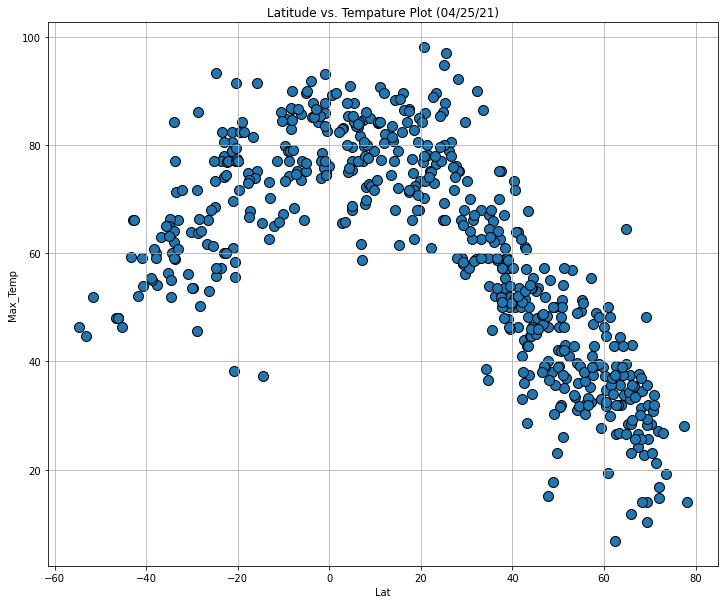

In [16]:
Lat_vs_Temp = Weather_df.plot(kind="scatter", x="Lat", y="Max_Temp",
                title="Latitude vs. Tempature Plot (04/25/21)",grid=True,s=100,
                figsize=(12,10),edgecolors='black')
plt.show()
Lat_vs_Temp.get_figure().savefig("../output_data/Temp_vs_Latitude.png")


## Latitude vs. Humidity Plot

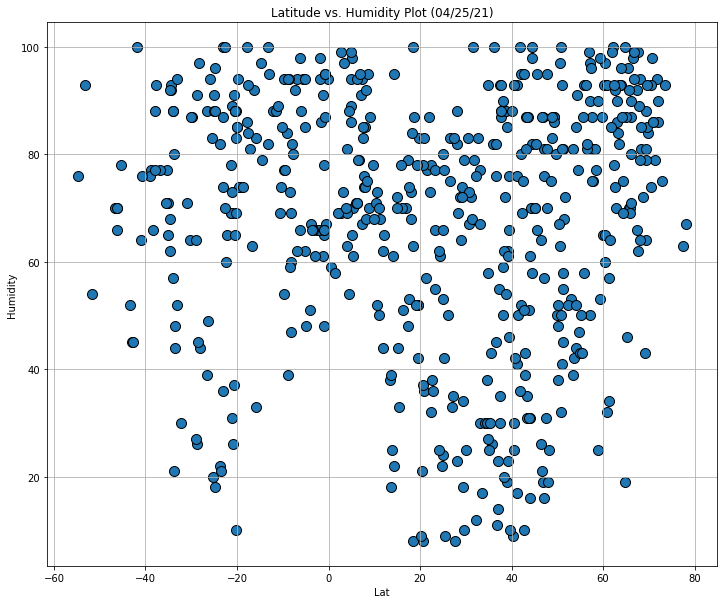

In [17]:
Lat_vs_Humid = Weather_df.plot(kind="scatter", x="Lat", y="Humidity",
                title="Latitude vs. Humidity Plot (04/25/21)",grid=True,s=100,
                figsize=(12,10),edgecolors='black')
plt.show()
Lat_vs_Humid.get_figure().savefig("../output_data/Temp_vs_Humid.png")

## Latitude vs. Cloudiness Plot

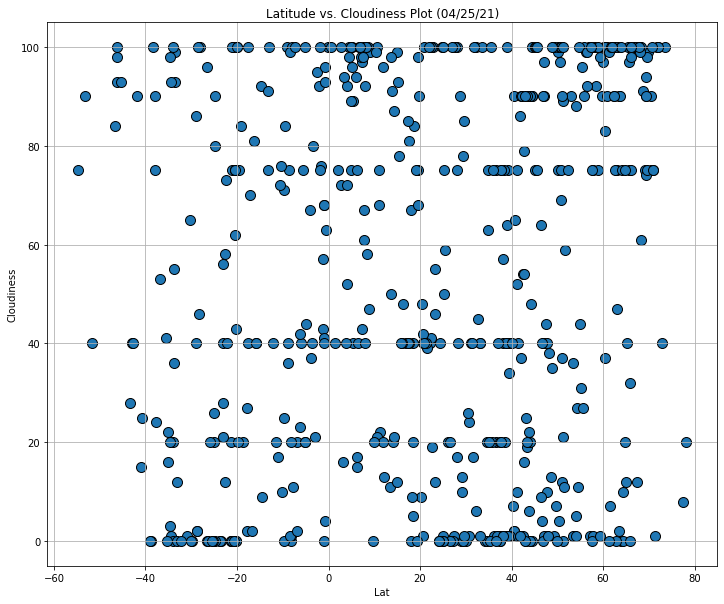

In [18]:
Lat_vs_Cloudiness = Weather_df.plot(kind="scatter", x="Lat", y="Cloudiness",
                title="Latitude vs. Cloudiness Plot (04/25/21)",grid=True,s=100,
                figsize=(12,10),edgecolors='black')
plt.show()
Lat_vs_Cloudiness.get_figure().savefig("../output_data/Temp_vs_Cloudiness.png")

## Latitude vs. Wind Speed Plot

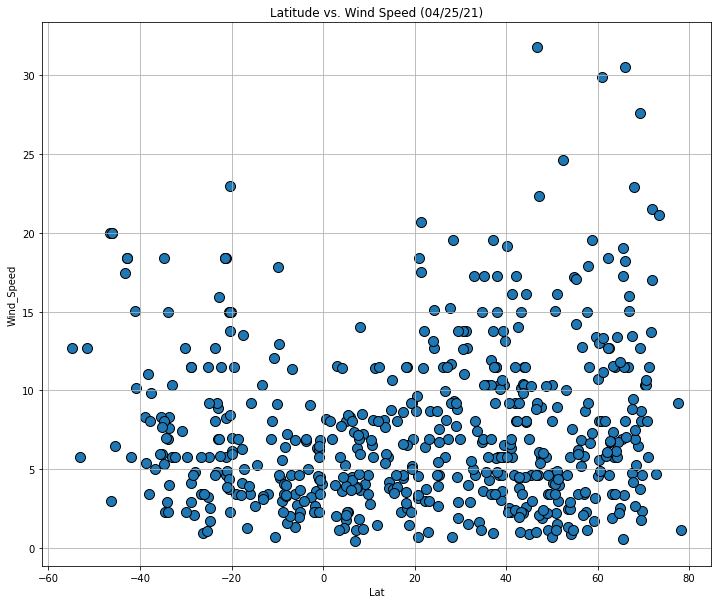

In [19]:
Lat_vs_Wind = Weather_df.plot(kind="scatter", x="Lat", y="Wind_Speed",
                title="Latitude vs. Wind Speed (04/25/21)",grid=True,s=100,
                figsize=(12,10),edgecolors='black')
plt.show()
Lat_vs_Cloudiness.get_figure().savefig("../output_data/Temp_vs_Wind.png")

## Linear Regression

In [20]:
#created new Data Frames to be able to plot by Northern and Souther Hemisphere
n_hemisphere_weather_df = Weather_df.loc[Weather_df["Lat"] >= 0]
s_hemisphere_weather_df = Weather_df.loc[Weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7805087408281869


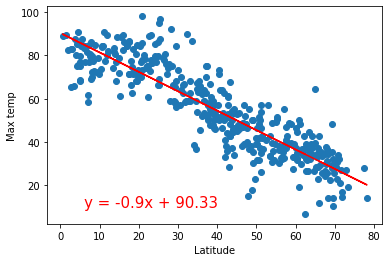

In [21]:
x_values = n_hemisphere_weather_df["Lat"]
y_values = n_hemisphere_weather_df["Max_Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4837090276099652


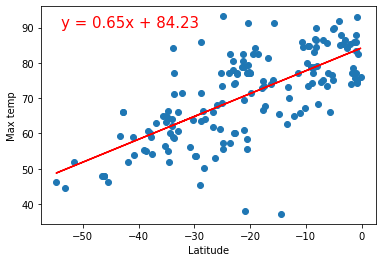

In [22]:
x_values = s_hemisphere_weather_df["Lat"]
y_values = s_hemisphere_weather_df["Max_Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-54,90),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.02643356155656765


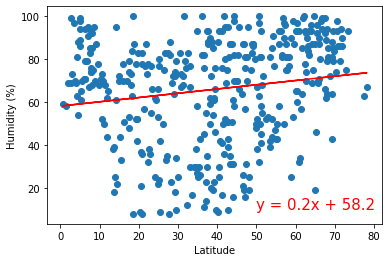

In [25]:
x_values = n_hemisphere_weather_df["Lat"]
y_values = n_hemisphere_weather_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.018030504203328662


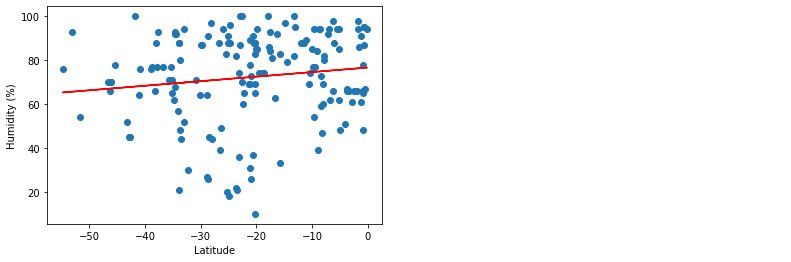

In [28]:
x_values = s_hemisphere_weather_df["Lat"]
y_values = s_hemisphere_weather_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.007818215044856724


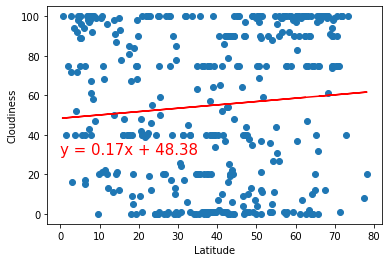

In [32]:
x_values = n_hemisphere_weather_df["Lat"]
y_values = n_hemisphere_weather_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0016320370699276806


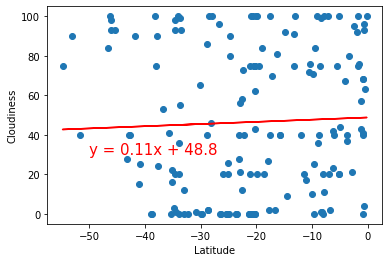

In [34]:
x_values = s_hemisphere_weather_df["Lat"]
y_values = s_hemisphere_weather_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03864077094346862


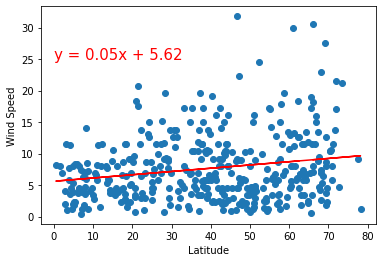

In [36]:
x_values = n_hemisphere_weather_df["Lat"]
y_values = n_hemisphere_weather_df["Wind_Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.13868899606447743


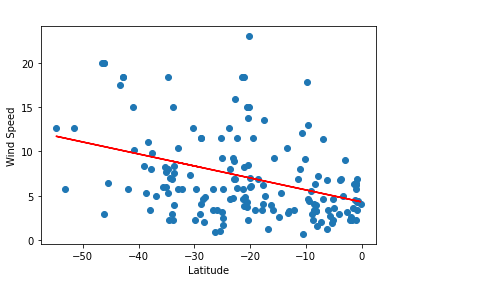

In [37]:
x_values = s_hemisphere_weather_df["Lat"]
y_values = s_hemisphere_weather_df["Wind_Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()